## In-class5 (Statistics)

A lecture prepared by Nathanael Judge (nzjudge@mtu.edu) M.S. Data Science, Michigan Technological University

##### Population vs Sample

Statistics attempt to provide insights into populations from smaller sample sizes. For example, if I wanted to find the average age of everyone in this class, I could individually ask everyone their age. However, if this were a class of 100 people, that will take longer. Moreover, the added data may not provide additional clarity. Instead, I could randomly ask 10 students their age and use that to estimate the true mean. If I did interview all 100 students, this would be the **population** average. If I only asked 10 students, this would be the **sample** mean.

##### Qualitative vs Quantitative Variables

Qualitative: Also known as categorical, these data represent descriptions or grouping of data. If we were surveying F1 teams, some qualitative data could be who makes the engine, tires, etc. 

Quantitative: Also known as numeric, these are data with hard numbers. Some quantitative F1 data could be top speed and number of podium finishes.

##### Review

Let's start with a review of mean, median, mode, and 5 number summary.

In [1]:
our_list = [5,6,7,27,98]

In [2]:
# mean (average): add up all values and divide by the number of values
the_sum = 0
for elem in our_list:
    the_sum += elem
print(f"The mean is {the_sum/len(our_list)}")

# also,
print(f"The mean is {sum(our_list)/len(our_list)}")

The mean is 28.6
The mean is 28.6


In [3]:
# median: 50th percentile/middle values
print(f"The index for the median is {len(our_list) // 2}")
print(f"The median is {our_list[len(our_list) // 2]}")
print(f"The median is {our_list[int(len(our_list) / 2)]}")
print(f"The median is {our_list[len(our_list) / 2]}")

The index for the median is 2
The median is 7
The median is 7


TypeError: list indices must be integers or slices, not float

In [ ]:
# if there are an even number of elements
our_list.append(99)
print(f"The median is {sum(our_list[len(our_list) // 2 - 1: len(our_list) // 2 + 1])/2}")
# remove the 99 to get our first list back
our_list.remove(99)
# Notice that jupyter notebook will return the output from the last line
our_list

The median is 17.0


[5, 6, 7, 27, 98]

We are going to make a function that will calculate the median based on the length of the list.

In [ ]:
def our_median(lst:list):
    lst.sort( )
    length = len(lst)
    middle = length // 2
    if length % 2 == 0:
        return(sum(lst[middle - 1: middle + 1])/2)
    else:
        return(lst[middle])

In [ ]:
test1 = [3,1,3,6,9,7,8]
test2 = [1,2,3,4,5,6,8,9]

print(f"{test1} has a median of {our_median(test1)}")
print(f"{test2} has a median of {our_median(test2)}")

[3, 1, 3, 6, 9, 7, 8] has a median of 6
[1, 2, 3, 4, 5, 6, 8, 9] has a median of 4.5


In [ ]:
# mode: the most frequent value
def our_mode(lst:list):
    temp_set = set(lst)
    maximum = 0
    mode = None
    for item in temp_set:
        test = lst.count( item )
        if test > maximum:
            mode = item
            maximum = test
    return(mode, maximum)

In [ ]:
test1 = [3,1,3,6,9,7,8]
mode, n = our_mode(test1)
print(f"The mode is {mode} and it appears {n} times")

The mode is 3 and it appears 2 times


Another name for the median is the 50th percentile. There are 4 other closely related percentiles -- 0th, 25th, 75th, and 100th. This is called the 5 number summary. You can use this summary to determine how close your data is and if you have outliers. 

In [ ]:
def five_number_summary(lst:list):
    lst.sort( )
    length = len(lst)
    middle = length // 2
    Q_0 = min(lst)
    Q_100 = max(lst)
    Q_50 = our_median(lst)
    if length % 2 == 0:
        Q_25 = our_median(lst[0:middle-1])
        Q_75 = our_median(lst[middle+1:])
    else:
        Q_25 = our_median(lst[0:middle])
        Q_75 = our_median(lst[middle+1:])
    return([Q_0, Q_25, Q_50, Q_75, Q_100])

In [ ]:
test1 = list(range(1,10))
test2 = [1,2,3,4,5,6,8,9]
test3 = [1,2,5,6,7,9,12,15,18,19,27]

print(f"{test1} has the following 5 number summary {five_number_summary(test1)}")
print(f"{test2} has the following 5 number summary {five_number_summary(test2)}")
print(f"{test3} has the following 5 number summary {five_number_summary(test3)}")

[1, 2, 3, 4, 5, 6, 7, 8, 9] has the following 5 number summary [1, 2.5, 5, 7.5, 9]
[1, 2, 3, 4, 5, 6, 8, 9] has the following 5 number summary [1, 2, 4.5, 8, 9]
[1, 2, 5, 6, 7, 9, 12, 15, 18, 19, 27] has the following 5 number summary [1, 5, 9, 18, 27]


##### Now with packages

While implementing these formulae ourselves can beneficial, python has a lot of this implemented in the packages numpy, scipy, and statistics.

In [ ]:
import numpy as np
import scipy as sp
import statistics as stat

In [ ]:
test = [1,2,5,6,7,9,12,15,18,19,27,27]
quartiles = np.percentile(test, [0, 0.25, 0.5, 0.75, 1])
print(f"Five number summary {quartiles}")
print(f"Median is {stat.median(test)}")
# throws an error if mode is not unique
print(f"Mode is {stat.mode(test)}")
print(f"Mean is {stat.mean(test)}")
print(f"Median is {np.median(test)}")
print(f"Mean is {np.mean(test)}")

Five number summary [1.     1.0275 1.055  1.0825 1.11  ]
Median is 10.5
Mode is 27
Mean is 12.333333333333334
Median is 10.5
Mean is 12.333333333333334


##### Stock Analysis

We are going to calculate the $R^2$ and correlation between stocks

Formulae:

deviations: $ X_i - \mu_x $. The difference between a given observation and then mean of the group

variance: $ \frac{\sum (X_i - \mu_x)^2}{n - 1} $. Average squared distance from a given observation to the mean of the group

standard deviation, s $=\sqrt{\text{variance}}$. Average distance from a given observation to the mean of the group

covariance: $ \frac{\sum (X_i - \mu_x) \cdot (Y_i - \mu_y)}{n - 1} $. This describes how much two different groups will deviate from their mean in the same way.

correlation(x,y) = $\frac{\text{covariance(x,y)}}{\text{s_x} \cdot \text{s_y}} $. This is covariance but scaled/normalized. Must be a value between -1 and 1

$R^2 = \text{correlation(x,y)}^2$. This tells you the percent of variance in x's data predictable by y and vice versa.

In [ ]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
data = pdr.DataReader(["amzn", "f","aapl", "tsla", "mrna", 'tri', 'xom', 'bac'], data_source = 'yahoo', start = '2019-01-01', end = '2020-08-17')

In [ ]:
print(f"The type of data is {type(data)}")
print(f"The columns are {data.columns}")
print(f"Type of columns {type(data.columns[0])}")

The type of data is <class 'pandas.core.frame.DataFrame'>
The columns are MultiIndex([('Adj Close', 'amzn'),
            ('Adj Close',    'f'),
            ('Adj Close', 'aapl'),
            ('Adj Close', 'tsla'),
            ('Adj Close', 'mrna'),
            ('Adj Close',  'tri'),
            ('Adj Close',  'xom'),
            ('Adj Close',  'bac'),
            (    'Close', 'amzn'),
            (    'Close',    'f'),
            (    'Close', 'aapl'),
            (    'Close', 'tsla'),
            (    'Close', 'mrna'),
            (    'Close',  'tri'),
            (    'Close',  'xom'),
            (    'Close',  'bac'),
            (     'High', 'amzn'),
            (     'High',    'f'),
            (     'High', 'aapl'),
            (     'High', 'tsla'),
            (     'High', 'mrna'),
            (     'High',  'tri'),
            (     'High',  'xom'),
            (     'High',  'bac'),
            (      'Low', 'amzn'),
            (      'Low',    'f'),
            (   

In [ ]:
small_data = data[[(    'Close', 'amzn'),
            (    'Close',    'f'),
            (    'Close', 'aapl'),
            (    'Close', 'tsla'),
            (    'Close', 'mrna'),
            (    'Close',  'tri'), 
            (    'Close',  'xom'),
            (    'Close',  'bac')]]
small_data.columns = ['Amazon', 'Ford', 'Apple', 'Tesla', 'Moderna', 'Thomson Reuters', 'Exxon Mobile', 'Bank of America'] 

In [ ]:
means = small_data.mean( axis = 0 )
print(f"Means is a {type(means)}")
means

Means is a <class 'pandas.core.series.Series'>


Amazon             2012.177609
Ford                  8.199976
Apple                63.164213
Tesla               101.259834
Moderna              28.929695
Thomson Reuters      66.256219
Exxon Mobile         64.059439
Bank of America      28.318171
dtype: float64

In [ ]:
print(f"The price of amazon on {small_data.index[0]} was {small_data.iloc[0,0]}")
print(f"The the mean price of amazon throughout this from {small_data.index[0]} to {small_data.index[-1]} was {means[0]}" )
print(f"The deviation is {small_data.iloc[0,0] - means[0]}")

The price of amazon on 2019-01-02 00:00:00 was 1539.1300048828125
The the mean price of amazon throughout this from 2019-01-02 00:00:00 to 2020-08-17 00:00:00 was 2012.1776090296303
The deviation is -473.0476041468178


In [ ]:
# this provides the number of row and columns of a dataframe/array 
m, n = small_data.shape

deviations = np.array(small_data - means)

In [ ]:
print(f"The shape is {deviations.shape}")
deviations

The shape is (410, 8)


array([[-4.73047604e+02, -2.99975510e-01, -2.36842138e+01, ...,
        -1.86962181e+01,  5.63056348e+00, -3.35817163e+00],
       [-5.11897580e+02, -4.19975396e-01, -2.76167127e+01, ...,
        -1.93862206e+01,  4.56056378e+00, -3.75817125e+00],
       [-4.36787594e+02, -1.19975682e-01, -2.60992147e+01, ...,
        -1.86462189e+01,  7.09056256e+00, -2.73817079e+00],
       ...,
       [ 1.14884241e+03, -1.16997540e+00,  5.18457888e+01, ...,
         9.01377715e+00, -2.10494406e+01, -1.96817033e+00],
       [ 1.13584241e+03, -1.15997564e+00,  5.17432879e+01, ...,
         8.90378417e+00, -2.08594382e+01, -1.84817140e+00],
       [ 1.17023230e+03, -1.21997559e+00,  5.14432848e+01, ...,
         9.05377807e+00, -2.14194396e+01, -2.41817110e+00]])

In [ ]:
cov = np.zeros((n,n))
# for every company
for j in range(n):
    # compare to every other company
    for i in range(n):
        cov[i,j] = sum(deviations[:,i] * deviations[:,j])/(m - 1)
        

In [ ]:
print(cov.shape)
cov

(8, 8)


array([[ 1.65369631e+05, -3.75451889e+02,  6.08532352e+03,
         2.80075134e+04,  7.29128993e+03,  1.16798483e+03,
        -4.02644167e+03, -6.93779635e+02],
       [-3.75451889e+02,  2.75989407e+00, -1.59128700e+01,
        -7.84164025e+01, -2.20876619e+01, -1.40896062e+00,
         2.14293884e+01,  4.64961136e+00],
       [ 6.08532352e+03, -1.59128700e+01,  3.09651204e+02,
         1.17069918e+03,  2.66022049e+02,  8.97315193e+01,
        -1.81968575e+02, -9.66873740e+00],
       [ 2.80075134e+04, -7.84164025e+01,  1.17069918e+03,
         5.45267781e+03,  1.28083290e+03,  2.26735534e+02,
        -7.99287813e+02, -1.06314988e+02],
       [ 7.29128993e+03, -2.20876619e+01,  2.66022049e+02,
         1.28083290e+03,  3.76879759e+02,  3.08274585e+01,
        -2.04065624e+02, -4.19898324e+01],
       [ 1.16798483e+03, -1.40896062e+00,  8.97315193e+01,
         2.26735534e+02,  3.08274585e+01,  5.58709657e+01,
        -3.82889147e+01,  7.99396314e+00],
       [-4.02644167e+03,  2.142938

In [ ]:
var = ((deviations * deviations).sum(axis = 0))/ ( m - 1 )
print(var.shape)
var

(8,)


array([1.65369631e+05, 2.75989407e+00, 3.09651204e+02, 5.45267781e+03,
       3.76879759e+02, 5.58709657e+01, 1.98488948e+02, 1.44588022e+01])

In [ ]:
std = var**(0.5)

In [ ]:
std

array([406.6566496 ,   1.66129289,  17.59690894,  73.84224947,
        19.41339124,   7.47468834,  14.08861057,   3.80247316])

In [ ]:
P_xy = np.zeros((n,n))
for j in range(n):
    for i in range(n):
        # correlation between amazon and amazon is perfect
        if i == j:
            P_xy[i,j] = 1
            continue
        P_xy[i,j] = cov[i,j] / (std[i] * std[j])

In [ ]:
P_xy = pd.DataFrame(P_xy, index = ['Amazon', 'Ford', 'Apple', 'Tesla', 'Moderna', 'Thomson Reuters', 'Exxon Mobile', 'Bank of America'] , columns = ['Amazon', 'Ford', 'Apple', 'Tesla', 'Moderna', 'Thomson Reuters', 'Exxon Mobile', 'Bank of America']  )
R_squared =  P_xy**2

In [ ]:
P_xy

,Amazon,Ford,Apple,Tesla,Moderna,Thomson Reuters,Exxon Mobile,Bank of America
Amazon,1.000000,-0.555751,0.850392,0.932700,0.923581,0.384252,-0.702790,-0.448670
Ford,-0.555751,1.000000,-0.544335,-0.639228,-0.684861,-0.113464,0.915578,0.736045
Apple,0.850392,-0.544335,1.000000,0.900957,0.778717,0.682206,-0.733993,-0.144500
Tesla,0.932700,-0.639228,0.900957,1.000000,0.893483,0.410792,-0.768299,-0.378637
Moderna,0.923581,-0.684861,0.778717,0.893483,1.000000,0.212443,-0.746106,-0.568822
Thomson Reuters,0.384252,-0.113464,0.682206,0.410792,0.212443,1.000000,-0.363590,0.281257
Exxon Mobile,-0.702790,0.915578,-0.733993,-0.768299,-0.746106,-0.363590,1.000000,0.656962
Bank of America,-0.448670,0.736045,-0.144500,-0.378637,-0.568822,0.281257,0.656962,1.000000


In [ ]:
R_squared

,Amazon,Ford,Apple,Tesla,Moderna,Thomson Reuters,Exxon Mobile,Bank of America
Amazon,1.000000,0.308859,0.723167,0.869928,0.853002,0.147650,0.493913,0.201305
Ford,0.308859,1.000000,0.296300,0.408612,0.469034,0.012874,0.838283,0.541762
Apple,0.723167,0.296300,1.000000,0.811723,0.606401,0.465405,0.538746,0.020880
Tesla,0.869928,0.408612,0.811723,1.000000,0.798311,0.168750,0.590283,0.143366
Moderna,0.853002,0.469034,0.606401,0.798311,1.000000,0.045132,0.556674,0.323559
Thomson Reuters,0.147650,0.012874,0.465405,0.168750,0.045132,1.000000,0.132198,0.079105
Exxon Mobile,0.493913,0.838283,0.538746,0.590283,0.556674,0.132198,1.000000,0.431599
Bank of America,0.201305,0.541762,0.020880,0.143366,0.323559,0.079105,0.431599,1.000000


###### Now as a function

In [ ]:
def stock_correlation(companies:tuple, start_date:str, end_date:str ):
    data = pdr.DataReader(companies, data_source = 'yahoo', start = start_date, end = end_date)
    column_list = []
    for company in companies:
        column_list.append(('Close', str(company)))
    small_data = data[column_list]
    small_data.columns = companies
    means = small_data.mean( axis = 0 )
    m, n = small_data.shape
    deviations = np.array(small_data - means)
    cov = np.zeros((n,n))
    for j in range(n):
        for i in range(n):
            cov[i,j] = sum(deviations[:,i] * deviations[:,j])/(m - 1)
    var = ((deviations * deviations).sum(axis = 0))/ ( m -1 )
    std = var**(0.5)
    P_xy = np.zeros((n,n))
    for j in range(n):
        for i in range(n):
            if i == j:
                P_xy[i,j] = 1
                continue
            P_xy[i,j] = cov[i,j] / (std[i] * std[j])
    return(pd.DataFrame(P_xy, index = companies, columns = companies))

In [ ]:
companies = ("amzn", "f","aapl", "tsla", "mrna", 'tri', 'xom', 'bac')
start = '2019-01-01'
end = '2020-08-17'

stock_correlation(companies, start, end)

,amzn,f,aapl,tsla,mrna,tri,xom,bac
amzn,1.000000,-0.555751,0.850392,0.932700,0.923581,0.384252,-0.702790,-0.448670
f,-0.555751,1.000000,-0.544335,-0.639228,-0.684861,-0.113464,0.915578,0.736045
aapl,0.850392,-0.544335,1.000000,0.900957,0.778717,0.682206,-0.733993,-0.144500
tsla,0.932700,-0.639228,0.900957,1.000000,0.893483,0.410792,-0.768299,-0.378637
mrna,0.923581,-0.684861,0.778717,0.893483,1.000000,0.212443,-0.746106,-0.568822
tri,0.384252,-0.113464,0.682206,0.410792,0.212443,1.000000,-0.363590,0.281257
xom,-0.702790,0.915578,-0.733993,-0.768299,-0.746106,-0.363590,1.000000,0.656962
bac,-0.448670,0.736045,-0.144500,-0.378637,-0.568822,0.281257,0.656962,1.000000


##### Now with packages

It turns out that pandas already has a function included. 

In [ ]:
pd_std = small_data.std( )
pd_cov = small_data.cov( )

print(f"Standard Deviations:\n{pd_std}")
print(f"Covariances: {pd_cov}")


Standard Deviations:
Amazon             406.656650
Ford                 1.661293
Apple               70.387636
Tesla              369.211251
Moderna             19.413391
Thomson Reuters      7.474688
Exxon Mobile        14.088611
Bank of America      3.802473
dtype: float64
Covariances:                         Amazon        Ford         Apple          Tesla  \
Amazon           165369.630660 -375.451889  24341.294099  140037.568193   
Ford               -375.451889    2.759894    -63.651480    -392.082014   
Apple             24341.294099  -63.651480   4954.419268   23413.983854   
Tesla            140037.568193 -392.082014  23413.983854  136316.947524   
Moderna            7291.289927  -22.087662   1064.088197    6404.164548   
Thomson Reuters    1167.984834   -1.408961    358.926077    1133.677682   
Exxon Mobile      -4026.441674   21.429388   -727.874298   -3996.439090   
Bank of America    -693.779635    4.649611    -38.674950    -531.574938   

                     Moderna  Thoms

In [ ]:
small_data.corr( )

,Amazon,Ford,Apple,Tesla,Moderna,Thomson Reuters,Exxon Mobile,Bank of America
Amazon,1.000000,-0.555751,0.850392,0.932700,0.923581,0.384252,-0.702790,-0.448670
Ford,-0.555751,1.000000,-0.544335,-0.639228,-0.684861,-0.113464,0.915578,0.736045
Apple,0.850392,-0.544335,1.000000,0.900957,0.778717,0.682206,-0.733993,-0.144500
Tesla,0.932700,-0.639228,0.900957,1.000000,0.893483,0.410792,-0.768299,-0.378637
Moderna,0.923581,-0.684861,0.778717,0.893483,1.000000,0.212443,-0.746106,-0.568822
Thomson Reuters,0.384252,-0.113464,0.682206,0.410792,0.212443,1.000000,-0.363590,0.281257
Exxon Mobile,-0.702790,0.915578,-0.733993,-0.768299,-0.746106,-0.363590,1.000000,0.656962
Bank of America,-0.448670,0.736045,-0.144500,-0.378637,-0.568822,0.281257,0.656962,1.000000


#### Probability

Rule 1) Probabilities must be 0 or greater

Rule 2) The probabilities of all events within a space must add to 1.

Rule 3) If events are independent, then the probability that any one of them can occur is equal to their added probability.

To calculate a probability, take the number of events that follow your critera and divide by the total number of possible events.

Example: Someone observes a group of students. 3 are wearing blue. 2 are wearing green. 6 are wearing red. 

If we asked them to line up randomly, the probability that the first one would be wearing blue would be $ \frac{\text{number wearing blue}}{\text{total number of students}} = \frac{3}{11}$. If we wanted probability that the first student would be wearing blue or green that would be $\frac{3 + 2}{11}$. If we wanted the probability the first student would be wearing blue and green that would be $0$ because each student is only wearing one color apiece.

##### Distributions

Distributions provide invaluable insight about how certain populations are likely to behave. We are going to cover the Gaussian(Normal), Log-normal, Poisson, and binomial.

##### Gaussian
mean: $\mu$

standard deviation: $\sigma$

pdf: $\frac{1}{\sigma \sqrt{2 \pi}} \cdot e^{-\frac{1}{2} \cdot \big(\frac{x - \mu}{\sigma}\big)^2}  $

<function matplotlib.pyplot.show(*args, **kw)>

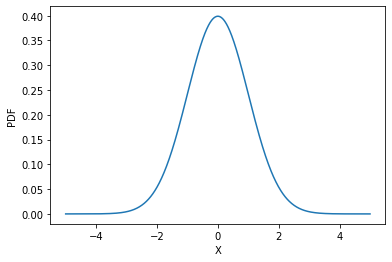

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
# note 1_000 is the same as 1000.
x = np.linspace(-5,5,1_000)
mean = 0
std = 1
gauss = 1/( std * math.sqrt(2 * math.pi)) * math.e**(-1/2 * ((x-mean)/std)**2)

plt.plot(x, gauss)
plt.xlabel("X")
plt.ylabel("PDF")
plt.show

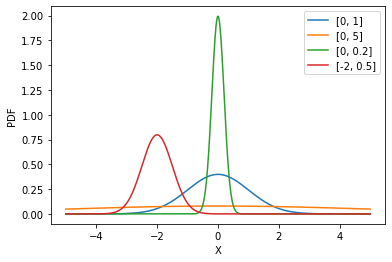

In [ ]:
parameters = [[0,1], [0,5], [0, 0.2], [-2, 0.5] ]

x = np.linspace(-5,5,1_000)
for parameter in parameters:
    mean = parameter[0]
    std = parameter[1]
    gauss = 1/( std * math.sqrt(2 * math.pi)) * math.e**(-1/2 * ((x-mean)/std)**2)
    plt.plot(x, gauss)
    plt.xlabel("X")
    plt.ylabel("PDF")
plt.legend(parameters)    
plt.show()

##### Binomial

This allows use to estimate the likelihood of a binary event. For example, if I have a 50-50 chance of getting a heads when I flip a coin, how likely is it that I get 6 heads if I flip the coin 10 times?

The equation to estimate this is $$ {{n}\choose{k}} \cdot p^{k} \cdot (1 - p)^{n-k} $$

For our example, the numbers become $$ {{10}\choose{6}} \cdot 0.5^{6} \cdot (1 - 0.5)^{10-6} $$
$$ = 0.205078125$$

Let's experiment below with 10 coin flips

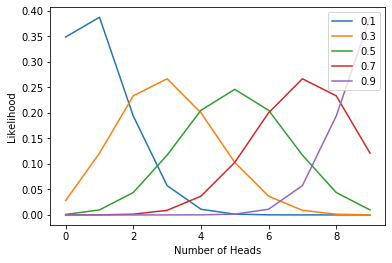

In [ ]:
import math
import numpy as np
def choose(n,k):
    return( (math.factorial(n)) / float((math.factorial(k) * math.factorial(n - k))) )


probabilities = [np.arange(0.1,1,0.2)]
heads = np.arange(0,10)
for probability in probabilities:
    p = [ ]
    for head in heads:
        p.append(choose(10,head) * probability**head * (1-probability)**(10 - head))
    plt.plot(heads, p)
    plt.xlabel("Number of Heads")
    plt.ylabel("Likelihood")
    plt.legend(np.round(probability,1))
plt.show( )

##### Log-Normal

This is a random variable whose logs are normally distributed.

pdf: $$\frac{1}{x} \cdot \frac{1}{\sigma\sqrt{2 \pi}} e^\frac{-\big(\text{ln}(x) - \mu\big)^2}{2 * \sigma^2}$$

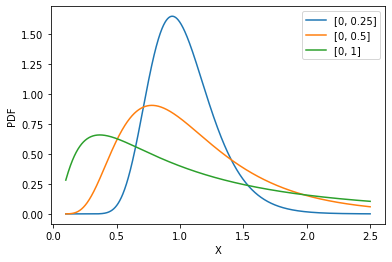

In [ ]:
import math
import numpy as np
parameters = [[0,0.25], [0,0.5], [0,1]]
x = np.linspace(0.1,2.5,1_000)

for parameter in parameters:
    mean = parameter[0]
    std = parameter[1]
    log_normal = 1 / x * 1 / (std * math.sqrt(2 * math.pi)) * math.e**(-(np.log(x) - mean)**2/(2 * std**2))
    plt.plot(x, log_normal)
    plt.xlabel("X")
    plt.ylabel("PDF")
plt.legend(parameters)    
plt.show()

##### Poisson

If we want to estimate the number of times an event occurs in an interval of time, we can use a Poisson distribution to help estimate.

$\lambda$ = expected number of times

$ k $ = new number of times

pdf: $$ \frac{\lambda^{k} \cdot e^{-\lambda}}{k!} $$

Now let's create an example, say we want to estimate the likelihood that 5 big companies could go bankrupt in the next 10 years. We collect data from the last 100 years and get the average number of big companies that go bankrupt per decade to be 10.

$$ \frac{10^{5} \cdot e^{-10}}{5!} $$
$$ = 0.03783 $$ 

Below, we are going to estimate the likelihood that k goals are scored in a soccer match given an average of $\lambda$ goals

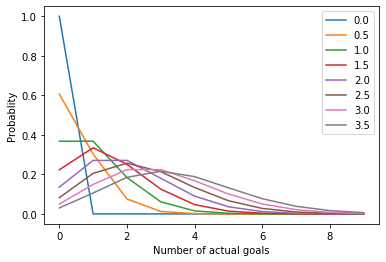

In [ ]:
import math
import numpy as np
from scipy.special import factorial
lambdas = np.arange(0,4.0,0.5)
k = np.arange(0,10,1)
for one_lambda in lambdas:
    probabilities =  one_lambda**(k) * math.e**(-one_lambda) / factorial(k)
    plt.plot(k, probabilities)
    plt.xlabel("Number of actual goals")
    plt.ylabel("Probablity")
plt.legend(lambdas)    
plt.show()

##### Now with packages

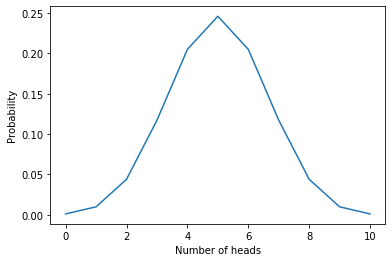

In [ ]:
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import binom
from scipy.stats import lognorm

k = np.arange(0,11)
plt.plot(k, binom.pmf(k,10, 0.5))
plt.xlabel('Number of heads')
plt.ylabel('Probability')
plt.show( )

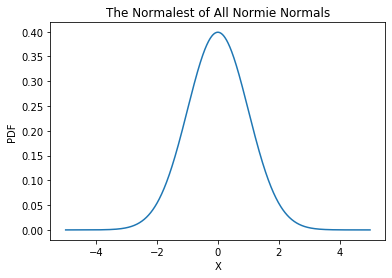

In [ ]:
x = np.linspace(-5,5,1_000)

plt.plot(x, norm.pdf(x,0,1))
plt.title('The Normalest of All Normie Normals')
plt.xlabel('X')
plt.ylabel('PDF')
plt.show( )

##### Confidence intervals

In statistics, it often comes down to having a rough idea or an estimate of the true value. While we can calculate a mean, the probability that it is exactly right is 0. We can strengthen the confidence of our answer by using a confidence interval.

In [ ]:
help(random.randint)

Help on built-in function randint:

randint(...) method of mtrand.RandomState instance
    randint(low, high=None, size=None, dtype='l')
    
    Return random integers from `low` (inclusive) to `high` (exclusive).
    
    Return random integers from the "discrete uniform" distribution of
    the specified dtype in the "half-open" interval [`low`, `high`). If
    `high` is None (the default), then results are from [0, `low`).
    
    Parameters
    ----------
    low : int
        Lowest (signed) integer to be drawn from the distribution (unless
        ``high=None``, in which case this parameter is one above the
        *highest* such integer).
    high : int, optional
        If provided, one above the largest (signed) integer to be drawn
        from the distribution (see above for behavior if ``high=None``).
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, i

In [ ]:
from scipy.stats import t
import scipy.stats
from numpy import random

# this will generate a numpy array of any integer between 0 
data = random.randint(0, 100, size=(1_000))
print(f"The first 5 data look like {data[0:5]}")
confidence_level = 0.95
mean = sum(data) / len(data)
std = np.std(data, ddof = 0)
n = len(data) 
# this gets our t value
t_value = abs(t.ppf((1 - confidence_level)/2, n - 1))
print(f"The t value is {t_value}")
print(f"The estimate average age of the data is {mean}")

left = mean - t_value * std/(n**0.5)
right = mean + t_value * std/(n**0.5)
print(f"Our confidence interval is ({round(left, 3)}, {round(right,3)})")


The first 5 data look like [14 89 25 30 76]
The t value is 1.9623414611334487
The estimate average age of the data is 48.233
Our confidence interval is (46.403, 50.063)


##### Now with packages

Now with a built in function. Notice that this function uses standard error instead of standard deviation. 

Standard error = $ \frac{s}{\sqrt{n}} $ where s is your sample standard deviation

In [ ]:
print(f"We get back a {type(t.interval(confidence_level, n - 1, mean, std/n**0.5))}")
t.interval(confidence_level, n - 1, mean, std/n**0.5)

We get back a <class 'tuple'>


(47.771587057651935, 57.02841294234806)

##### Regression

We are going to quickly build a very basic machine learning model using linear regression. We will try to predict today's closing stock price based on what other companies closed. The steps will be to check for correlations the prediction companies and then run the data. We will choose amazon as the company we want to predict and the other companies for our predictors.

In [ ]:
companies = ("amzn", "tsla", "mrna", 'tri', 'xom', 'bac')
start = '2019-01-01'
end = '2020-08-17'

data = pdr.DataReader(companies, data_source = 'yahoo', start = start, end = end)
column_list = []
for company in companies:
    column_list.append(('Close', str(company)))
small_data = data[column_list]
small_data.columns = companies

In [ ]:
# we will delete mrna and xom
stock_correlation(("tsla", "mrna", 'tri', 'xom', 'bac'), start, end)

,tsla,mrna,tri,xom,bac
tsla,1.000000,0.893483,0.410792,-0.768299,-0.378637
mrna,0.893483,1.000000,0.212443,-0.746106,-0.568822
tri,0.410792,0.212443,1.000000,-0.363590,0.281257
xom,-0.768299,-0.746106,-0.363590,1.000000,0.656962
bac,-0.378637,-0.568822,0.281257,0.656962,1.000000


In [ ]:
stock_correlation(('tsla','tri', 'bac'), start, end)

,tsla,tri,bac
tsla,1.000000,0.410792,-0.378637
tri,0.410792,1.000000,0.281257
bac,-0.378637,0.281257,1.000000


In [ ]:
stock_correlation(('amzn','tsla','tri', 'bac'), start, end)

,amzn,tsla,tri,bac
amzn,1.000000,0.932700,0.384252,-0.448670
tsla,0.932700,1.000000,0.410792,-0.378637
tri,0.384252,0.410792,1.000000,0.281257
bac,-0.448670,-0.378637,0.281257,1.000000


In [ ]:
predictors = small_data[['tsla', 'tri', 'bac']]
y = small_data['amzn']

In [ ]:
m,n = predictors.shape
train_data = predictors.iloc[0:m-5]
test_data = predictors.iloc[m-5:]
train_y = y.iloc[0:m-5]
test_y = y.iloc[m-5:]

We will be using the main machine learning package's function for our linear regression. We will be using this package for most of our machine learning work.

In [ ]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression( )
regression.fit(train_data, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(f"Our intercept is {regression.intercept_} and the coefficents are {regression.coef_}")
predictions = regression.predict(test_data)

Our intercept is 1716.2819593105162 and the coefficents are [  0.92271748   4.44713174 -16.47445182]


In [ ]:
print(f"We predicted {predictions}.")
print(f"The actual was {list(test_y)}.")
print(f"The difference is {predictions - list(test_y)}")

We predicted [2872.36364754 3047.17196627 3112.64077297 3137.58860335 3318.28427153].
The actual was [3080.669921875, 3162.239990234375, 3161.02001953125, 3148.02001953125, 3182.409912109375].
The difference is [-208.30627434 -115.06802396  -48.37924656  -10.43141618  135.87435942]
